In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time

In [3]:
def obsids2txt(obsids,fname):
        f=open(fname,'w')
        f.write('\n'.join(map(str,list(obsids)) ))
        f.close()

In [5]:
# wedgecut_and_rescut_obsids_path = '/nfs/eor-00/h1/beards/obs_lists/long_runs/wedge_cut_plus_res_cut.txt'
wedgecut_and_rescut_obsids_path = '/nfs/mwa-09/r1/abrahamn/21cmIR/21cmIRxcor/beardsley_data/wedge_cut_plus_res_cut.txt'

In [6]:
obsids = np.genfromtxt(wedgecut_and_rescut_obsids_path,dtype=int)

In [7]:
num_obsids_in_set = 100

In [8]:
spacings_hours = [0,.08,.4]

In [9]:
obsidsets = []
for spacing_hours in spacings_hours:
    print(spacing_hours)
    obsidset = [obsids[0]]
    for obsidi in range(num_obsids_in_set-1):
        #print('\t'+str(obsidi))
        obsid_distances_hours = (np.array(obsids)-obsidset[obsidi])/60./60
        good = np.where(obsid_distances_hours > spacing_hours)[0]
        currobsid = obsids[good[np.argmin(obsid_distances_hours[good])]]
        obsidset.append(currobsid)
    obsidsets.append(obsidset)
obsidsets = np.array(obsidsets)

0
0.08
0.4


In [10]:
for i in range(3):
    #print(float(max(obsidsets[i])-min(obsidsets[i]))/3600/24)
    t = Time(obsidsets[i], format='gps', scale='utc')
    print(np.unique(np.floor(t.jd)))
    print(len(np.unique(np.floor(t.jd))))

[ 2456528.  2456532.]
2
[ 2456528.  2456532.  2456538.  2456540.  2456542.]
5
[ 2456528.  2456532.  2456538.  2456540.  2456542.  2456545.  2456547.
  2456549.  2456553.  2456555.  2456566.  2456568.  2456570.  2456574.
  2456576.  2456581.  2456589.  2456591.  2456595.]
19


In [11]:
# how many night is the whole 32 hour integration spread over?
t = Time(obsids, format='gps', scale='utc')
print(np.unique(np.floor(t.jd)))
print(len(np.unique(np.floor(t.jd))))

[ 2456528.  2456532.  2456538.  2456540.  2456542.  2456545.  2456547.
  2456549.  2456553.  2456555.  2456566.  2456568.  2456570.  2456574.
  2456576.  2456581.  2456589.  2456591.  2456595.  2456597.  2456614.
  2456615.  2456625.  2456626.]
24


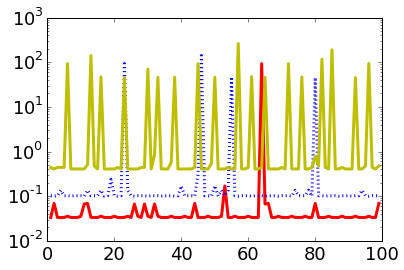

In [12]:
matplotlib.rcParams.update({'font.size': 18})

stys = ['r-','b:','y-','k:']
for obsidseti in range(len(spacings_hours)):
    plt.semilogy(1.*(obsidsets[obsidseti]-np.roll(obsidsets[obsidseti],1))/3600,stys[obsidseti],lw=3)

In [13]:
obsids2txt(obsidsets[0],'obsids_spaced_by_0hours.txt')
obsids2txt(obsidsets[1],'obsids_spaced_by_0_08hours.txt')
obsids2txt(obsidsets[2],'obsids_spaced_by_0_4hours.txt')

In [14]:
import imp
import mwa_utils
imp.reload(mwa_utils)
import commands
import numpy as np
import cPickle as pickle

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
matplotlib.rcParams.update({'font.size': 16})

In [24]:
# run on eor-09
fhdcubesroot = '/nfs/mwa-03/r1/EoR2013/fhd_apb_EoR0_high_sem1_1/Healpix/'
#fhdcubesroot = '/home/abrahamn/xcor_data/fhd_cubes/fhd_apb_EoR0_high_sem1_1/'

# analysis_root = '/nfs/mwa-09/r1/abrahamn/21cmIR/21cmfreqavgcubes/'
#analysis_root = '/home/abrahamn/xcor_data/21cmfreqavgcubes/'
analysis_root = '/nfs/mwa-09/r1/abrahamn/xcor_data/21cmfreqavgcubes/'

In [25]:
fhdlabels = ['obsids_spaced_by_0hours','obsids_spaced_by_0_08hours','obsids_spaced_by_0_4hours']
fhdhumanlabels = ['3 hours spread over 1 night','3 hours spread over 5 nights','3 hours spread over 19 nights']

In [26]:
# n = 100
# dtheta_rad = 6./60*np.pi/180.
# angvals_rad = np.linspace(-dtheta_rad*n/2,dtheta_rad*((n-1.)/2.),n)

# dirty_xx0,counts_cube,weights_xx0,model_xx0,beam_squared_xx0 = mwa_utils.grid_fhd_cubes(freq_averaged_cubedat0, angvals_rad, 0, -27.*np.pi/180.)

In [27]:
# print(weights_xx0.shape)
# plt.imshow(counts_cube,interpolation='nearest',cmap='hot',vmax=3)
# plt.colorbar()

In [28]:
# weights_uv = np.abs(np.fft.fftshift(np.fft.fft2(weights_xx0)))
# weights_uv /= np.sum(weights_uv)
# plt.imshow(weights_uv,interpolation='nearest',cmap='jet')
# plt.colorbar()

In [29]:
300./185/1000*60*60

5.837837837837839

In [30]:
dtheta_amin = 6
# for i in range(len(fhdlabels)):
#     print('loading '+(fhdlabels[i]))
#     freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,'Combined_obs_'+fhdlabels[i])
#     mwa_image = mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=dtheta_amin, n=100)    
#     pickle.dump( mwa_image, open( analysis_root+'Combined_obs_'+fhdlabels[i]+'_6amin_10deg.p', "wb" ) )

mwa_images = []
for i in range(len(fhdlabels[:16])):
    print('loading '+(str(i)))
    mwa_images.append(pickle.load( open( analysis_root+'Combined_obs_'+fhdlabels[i]+'_6amin_10deg.p', "rb" ) ))

loading 0
loading 1
loading 2


In [32]:
dtheta_amin = 6
fhddeeplabel = 'Combined_obs_wedge_cut_plus_res_cut'
# freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,fhddeeplabel)
# mwa_image = mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=dtheta_amin, n=100)    
# pickle.dump( mwa_image, open( analysis_root+fhddeeplabel+'_6amin_10deg.p', "wb" ) )

mwa_deep_image = pickle.load( open( analysis_root+fhddeeplabel+'_6amin_10deg.p', "rb" ) )

In [34]:
# load digitized k_para=0 bin of Adam's 3D pspec analysis of the same dataset

d = '/nfs/mwa-09/r1/abrahamn/21cmIR/21cmIRxcor/beardsley_data/'


In [58]:
# see mwa_2D_vs_3D_pspec_values_comparison.nb
Dpara = 5895.# Mpc/h # to z=6.8, corresponding to fcent = 182MHz
dDpara = 314.# Mpc/h # corresponding to 31MHz of bandwidth

In [59]:
k_and_P_dat = np.genfromtxt(d+'mwa_deep_dirty_pspec_kpara=0_xx.csv',skip_header=1,delimiter=',')
adam_k_vals_dirty = k_and_P_dat[:,0]
adam_P_vals_dirty = k_and_P_dat[:,1]
adam_ell_vals_dirty = adam_k_vals_dirty*Dpara

k_and_P_dat = np.genfromtxt(d+'mwa_deep_res_pspec_kpara=0_xx.csv',skip_header=1,delimiter=',')
adam_k_vals_res = k_and_P_dat[:,0]
adam_P_vals_res = k_and_P_dat[:,1]
adam_ell_vals_res = adam_k_vals_res*Dpara

lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2514
lmag.max() = 2514
lmag.max() = 2514


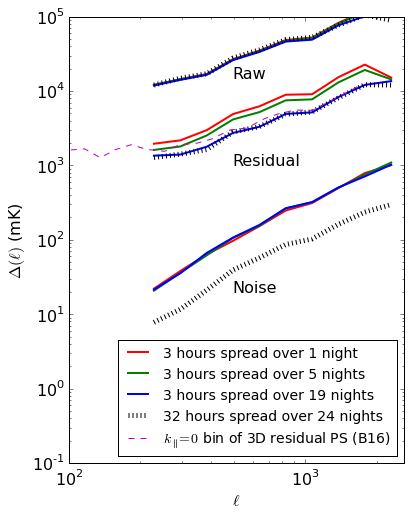

In [61]:
plt.figure(figsize=(6,8))

nbins = 10
lmin,lmax = 200,2600
uselogbins=uselogbins=True
cols = ['r','g','b']

# plot pointing integrations per day
for i in range(len(fhdlabels)):
    col = cols[i]
    lw = 2
    
    lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_images[i].dirty_xx_u0, mwa_images[i].weights_xx0, mwa_images[i].dtheta_rad,\
                                                                       nbins,lmin,lmax,hann=False,uselogbins=uselogbins)
    lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].model_xx_u0, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad,\
                                                                         nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
    lbincenters, Cl_dirty_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].dirty_xx_u1, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad,\
                                                                            nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
    
    plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_dirty0*1.e6),col,linewidth=lw)
    plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_res0*1.e6),col,linewidth=lw,label=fhdhumanlabels[i])
    plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_dirty_diff*1.e6),col,linewidth=lw)
    
lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0, mwa_deep_image.weights_xx0, mwa_deep_image.dtheta_rad,\
                                                                   nbins,lmin,lmax,hann=False,uselogbins=uselogbins)
lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.model_xx_u0, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad,\
                                                                     nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
lbincenters, Cl_dirty_diff, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.dirty_xx_u1, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, \
                                                                           nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_dirty0*1.e6),'k:',linewidth=5)
plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_res0*1.e6),'k:',linewidth=5,label='32 hours spread over 24 nights')
plt.loglog(lbincenters,np.sqrt(lbincenters**2/(2*np.pi)*Cl_dirty_diff*1.e6),'k:',linewidth=5)

# plt.loglog(adam_ell_vals_dirty,np.sqrt(adam_ell_vals_dirty**2./(2.*np.pi)*adam_P_vals_dirty/(Dpara**2*dDpara)),'c--',label="$k_{\parallel}=0$ bin of 3D raw PS (B16)")
plt.loglog(adam_ell_vals_res,np.sqrt(adam_ell_vals_res**2./(2.*np.pi)*adam_P_vals_res/(Dpara**2*dDpara)),'m--',label="$k_{\parallel}=0$ bin of 3D residual PS (B16)")

plt.text(500, 15000, 'Raw', fontsize=16)
plt.text(500, 1000, 'Residual', fontsize=16)
plt.text(500, 20, 'Noise', fontsize=16)

matplotlib.rcParams.update({'font.size': 16})
plt.ylabel(r'$\Delta(\ell)$ (mK)')
plt.ylim([.1,1e5])
plt.xlim([100.,2600])
plt.legend(fontsize=14,loc=4)
plt.xlabel(r'$\ell$')

plt.savefig('res_pspec_of_100_obsids_with_diff_spacings_6amin_delta.pdf',bbox_inches='tight')

In [51]:
# plt.figure(figsize=(6,6))

# nbins = 10
# lmin,lmax = 200,2600
# uselogbins=uselogbins=True
# cols = ['r','g','b']

# # plot pointing integrations per day
# for i in range(len(fhdlabels)):
#     col = cols[i]
#     lw = 2
    
#     lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_images[i].dirty_xx_u0, mwa_images[i].weights_xx0, mwa_images[i].dtheta_rad,\
#                                                                        nbins,lmin,lmax,hann=False,uselogbins=uselogbins)
#     lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].model_xx_u0, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad,\
#                                                                          nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
#     lbincenters, Cl_dirty_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].dirty_xx_u1, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad,\
#                                                                             nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
    
#     plt.loglog(lbincenters,Cl_dirty0*1.e6,col,linewidth=lw)
#     plt.loglog(lbincenters,Cl_res0*1.e6,col,linewidth=lw,label=fhdhumanlabels[i])
#     plt.loglog(lbincenters,Cl_dirty_diff*1.e6,col,linewidth=lw)
    
# lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0, mwa_deep_image.weights_xx0, mwa_deep_image.dtheta_rad,\
#                                                                    nbins,lmin,lmax,hann=False,uselogbins=uselogbins)
# lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.model_xx_u0, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad,\
#                                                                      nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
# lbincenters, Cl_dirty_diff, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.dirty_xx_u1, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, \
#                                                                            nbins,lmin,lmax, hann=False,uselogbins=uselogbins)
# plt.loglog(lbincenters,Cl_dirty0*1.e6,'k:',linewidth=5)
# plt.loglog(lbincenters,Cl_res0*1.e6,'k:',linewidth=5,label='32hr')
# plt.loglog(lbincenters,Cl_dirty_diff*1.e6,'k:',linewidth=5)

# plt.text(500, 8000, 'Raw', fontsize=16)
# plt.text(500, 800, 'Residual', fontsize=16)
# plt.text(500, 10, 'Noise', fontsize=16)

# matplotlib.rcParams.update({'font.size': 16})
# plt.ylabel(r'$C(\ell)$ (mK$^2$)')
# # plt.ylim([1.e-0,1.e6])
# plt.xlim([100.,2600])
# # plt.legend(fontsize=12,loc=2)
# plt.xlabel(r'$\ell$')

# plt.savefig('res_pspec_of_100_obsids_with_diff_spacings_6amin.pdf',bbox_inches='tight')

In [3]:
2000.**2*6.3/1.e6

25.2